In [61]:
library(reshape2)
library(ggplot2)
library(dplyr)
library(tidyr)

In [4]:
mashr_dir = "/hps/nobackup/hipsci/scratch/GTEx/MASHR_INPUT/"

In [5]:
# list.files(mashr_dir,"MASHR_scInc")

In [7]:
sign_res = paste0(mashr_dir,"MASHR_scInc_local_false_sign_rate.txt")
mean_beta = paste0(mashr_dir,"MASHR_scInc_posterior_mean.txt")
std_beta = paste0(mashr_dir,"MASHR_scInc_posterior_standard_deviation.txt")
tissue_samplesize = paste0(mashr_dir,"tissueSampleSize_v7.txt")

In [58]:
##Functions
reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd,method="complete")
  cormat <-cormat[hc$order, hc$order]
}

In [9]:
get_lower_tri <- function(cormat){
  cormat[upper.tri(cormat)]<- NA
  return(cormat)
}

In [10]:
#V6 sc included
lsfrMat = read.delim(sign_res,as.is=T, row.names=1)
posteriorMean = read.delim(mean_beta,as.is=T, row.names=1)

In [11]:
nrow(lsfrMat)

[1] 7586

In [12]:
head(lsfrMat)

,pool1_13_noddd_D11.FPP,pool1_13_noddd_D11.P_FPP,pool1_13_noddd_D30.Astro,pool1_13_noddd_D30.DA,pool1_13_noddd_D30.Epen1,pool1_13_noddd_D30.Sert,pool1_17_D52.ROT.Astro,pool1_17_D52.ROT.DA,pool1_17_D52.ROT.Epen1,pool1_17_D52.ROT.Sert,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
1_100088517_C_T-ENSG00000162688,0.8368776270,0.857050284,0.857282533,8.704010e-01,0.8533494136,0.87024129,0.87510736,0.871920055,0.8439529486,0.881624877,...,8.310251e-01,8.645379e-01,8.412896e-01,8.770913e-01,8.808719e-01,8.625379e-01,8.227780e-01,8.339754e-01,8.554107e-01,8.792185e-01
1_100291080_C_T-ENSG00000156875,0.2576963451,0.361795024,0.235901681,4.826098e-01,0.4732941910,0.49548572,0.40272717,0.364789088,0.4150558993,0.320247002,...,1.601341e-01,1.314062e-01,3.778046e-01,4.624528e-01,3.434180e-01,4.210659e-01,2.338178e-01,4.075893e-01,3.492515e-01,4.920959e-01
1_10043142_G_A-ENSG00000162441,0.9999999995,0.999999999,0.999999999,1.000000e+00,0.9999999994,1.00000000,1.00000000,0.999999999,0.9999999995,0.999999999,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1_100518832_T_C-ENSG00000156876,0.0005797932,0.002070684,0.001738047,9.004775e-06,0.0003010376,0.00337120,0.32795056,0.002109567,0.0004170323,0.005741213,...,2.065891e-16,1.240428e-17,9.796146e-06,2.667241e-05,3.501420e-07,8.211333e-02,2.513709e-07,2.391981e-05,2.173801e-03,2.937788e-07
1_100587146_T_C-ENSG00000117620,0.1034974722,0.261161271,0.025866318,5.744199e-02,0.0254250982,0.04367916,0.01434028,0.002968737,0.0025483165,0.011471132,...,4.794025e-04,9.355439e-09,1.717350e-01,2.106300e-04,5.813853e-05,4.605223e-04,6.660410e-04,5.790721e-03,1.793607e-01,2.211425e-01
1_100713300_G_T-ENSG00000137992,0.1297575123,0.100664576,0.394011654,1.851383e-01,0.4543277478,0.36982965,0.42507041,0.259739850,0.4391136889,0.465247650,...,2.870397e-13,1.573953e-11,5.202815e-12,3.083679e-12,2.645489e-13,8.291370e-15,1.424372e-14,3.910460e-14,2.433825e-11,2.764486e-12


In [13]:
head(rownames(lsfrMat))
genes = gsub(".*-","",rownames(lsfrMat))
head(genes)

[1] "1_100088517_C_T-ENSG00000162688" "1_100291080_C_T-ENSG00000156875"
[3] "1_10043142_G_A-ENSG00000162441"  "1_100518832_T_C-ENSG00000156876"
[5] "1_100587146_T_C-ENSG00000117620" "1_100713300_G_T-ENSG00000137992"

[1] "ENSG00000162688" "ENSG00000156875" "ENSG00000162441" "ENSG00000156876"
[5] "ENSG00000117620" "ENSG00000137992"

In [14]:
# write.csv(genes, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/mashr/genes_expressed_in_all_tissues.csv")

In [15]:
colnames(lsfrMat)

[1] "pool1_13_noddd_D11.FPP"               
 [2] "pool1_13_noddd_D11.P_FPP"             
 [3] "pool1_13_noddd_D30.Astro"             
 [4] "pool1_13_noddd_D30.DA"                
 [5] "pool1_13_noddd_D30.Epen1"             
 [6] "pool1_13_noddd_D30.Sert"              
 [7] "pool1_17_D52.ROT.Astro"               
 [8] "pool1_17_D52.ROT.DA"                  
 [9] "pool1_17_D52.ROT.Epen1"               
[10] "pool1_17_D52.ROT.Sert"                
[11] "pool1_17_D52.Astro"                   
[12] "pool1_17_D52.DA"                      
[13] "pool1_17_D52.Epen1"                   
[14] "pool1_17_D52.Sert"                    
[15] "Adipose_Subcutaneous"                 
[16] "Adipose_Visceral_Omentum"             
[17] "Adrenal_Gland"                        
[18] "Artery_Aorta"                         
[19] "Artery_Coronary"                      
[20] "Artery_Tibial"                        
[21] "Brain_Amygdala"                       
[22] "Brain_Anterior_cingulate_cortex_BA24" 
[23] "Brain_Caudate_basal_ganglia"          
[24] "Brain_Cerebellar_Hemisphere"          
[25] "Brain_Cerebellum"                     
[26] "Brain_Cortex"                         
[27] "Brain_Frontal_Cortex_BA9"             
[28] "Brain_Hippocampus"                    
[29] "Brain_Hypothalamus"                   
[30] "Brain_Nucleus_accumbens_basal_ganglia"
[31] "Brain_Putamen_basal_ganglia"          
[32] "Brain_Spinal_cord_cervical_c.1"       
[33] "Brain_Substantia_nigra"               
[34] "Breast_Mammary_Tissue"                
[35] "Cells_EBV.transformed_lymphocytes"    
[36] "Cells_Transformed_fibroblasts"        
[37] "Colon_Sigmoid"                        
[38] "Colon_Transverse"                     
[39] "Esophagus_Gastroesophageal_Junction"  
[40] "Esophagus_Mucosa"                     
[41] "Esophagus_Muscularis"                 
[42] "Heart_Atrial_Appendage"               
[43] "Heart_Left_Ventricle"                 
[44] "iPSC"                                 
[45] "Liver"                                
[46] "Lung"                                 
[47] "Minor_Salivary_Gland"                 
[48] "Muscle_Skeletal"                      
[49] "Nerve_Tibial"                         
[50] "Ovary"                                
[51] "Pancreas"                             
[52] "Pituitary"                            
[53] "Prostate"                             
[54] "Skin_Not_Sun_Exposed_Suprapubic"      
[55] "Skin_Sun_Exposed_Lower_leg"           
[56] "Small_Intestine_Terminal_Ileum"       
[57] "Spleen"                               
[58] "Stomach"                              
[59] "Testis"                               
[60] "Thyroid"                              
[61] "Uterus"                               
[62] "Vagina"                               
[63] "Whole_Blood"

In [16]:
# sampleSizeTissues = read.delim(tissue_samplesize,as.is=T, sep=",")
# sampleSizeTissues
# sampleSizeTissues = sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]
# head(sampleSizeTissues)
# all(sampleSizeTissues$tissue == colnames(lsfrMat))
# sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]

In [70]:
ratio = 2
lsfrThreshold = 0.05
any = T
both = F
smallest = F

In [71]:
sameSignMagnitude = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))
sameSign = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))
total = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))

In [72]:
cols = grep("_D",colnames(lsfrMat))
length(colnames(lsfrMat)[cols])

[1] 14

In [73]:
nrow(lsfrMat)

[1] 7586

In [74]:
options(warn=2)
if(sum(any,both, smallest)==1){
  for(colN in 1:ncol(lsfrMat)){
    for(colM in colN:ncol(lsfrMat)){
      if(any){
        toConsider = unique(c(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold)))
      } else if(both) {
        toConsider = intersect(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold))
      } else if(smallest){
        if(sampleSizeTissues$n[colN] > sampleSizeTissues$n[colM]){
          toConsider = which(lsfrMat[,colM]<lsfrThreshold)
        } else {
          toConsider = which(lsfrMat[,colN]<lsfrThreshold)
        }
      }
      total[colN,colM] = length(toConsider)
      total[colM,colN] = total[colN,colM]
      
      tmpInfo = posteriorMean[toConsider,colN]/posteriorMean[toConsider,colM]
      tmpInfo2 = tmpInfo[which(tmpInfo>0)]
      sameSign[colN,colM] = length(tmpInfo2)
      sameSign[colM,colN] = sameSign[colN,colM]
      
      tmpInfo2[which(tmpInfo2<1)] = 1/tmpInfo2[which(tmpInfo2<1)]
      sameSignMagnitude[colN,colM] = length(which(tmpInfo2<=ratio))
      sameSignMagnitude[colM,colN] = sameSignMagnitude[colN,colM]
    }
  }
} else {
  print("Setting issue.")
}

In [75]:
# options(warn=1)

pairwiseSharingSign = sameSign/total
pairwiseSharing = sameSignMagnitude/total

colnames(pairwiseSharing) = colnames(lsfrMat)
rownames(pairwiseSharing) = colnames(lsfrMat)
colnames(pairwiseSharingSign) = colnames(lsfrMat)
rownames(pairwiseSharingSign) = colnames(lsfrMat)

##Sign only
upper_tri <- get_lower_tri(reorder_cormat(as.matrix(pairwiseSharingSign)))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
head(melted_cormat)

Var1,Var2,value
Cells_EBV.transformed_lymphocytes,Cells_EBV.transformed_lymphocytes,1.0000000
Whole_Blood,Cells_EBV.transformed_lymphocytes,0.8502383
Brain_Cerebellar_Hemisphere,Cells_EBV.transformed_lymphocytes,0.8164971
Brain_Cerebellum,Cells_EBV.transformed_lymphocytes,0.8069872
Brain_Spinal_cord_cervical_c.1,Cells_EBV.transformed_lymphocytes,0.8379447
Brain_Hypothalamus,Cells_EBV.transformed_lymphocytes,0.8293142


In [76]:
# install.packages("ggthemes")

In [77]:
library(ggthemes)

In [78]:
col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [79]:
colnames(pairwiseSharingSign)

[1] "pool1_13_noddd_D11.FPP"               
 [2] "pool1_13_noddd_D11.P_FPP"             
 [3] "pool1_13_noddd_D30.Astro"             
 [4] "pool1_13_noddd_D30.DA"                
 [5] "pool1_13_noddd_D30.Epen1"             
 [6] "pool1_13_noddd_D30.Sert"              
 [7] "pool1_17_D52.ROT.Astro"               
 [8] "pool1_17_D52.ROT.DA"                  
 [9] "pool1_17_D52.ROT.Epen1"               
[10] "pool1_17_D52.ROT.Sert"                
[11] "pool1_17_D52.Astro"                   
[12] "pool1_17_D52.DA"                      
[13] "pool1_17_D52.Epen1"                   
[14] "pool1_17_D52.Sert"                    
[15] "Adipose_Subcutaneous"                 
[16] "Adipose_Visceral_Omentum"             
[17] "Adrenal_Gland"                        
[18] "Artery_Aorta"                         
[19] "Artery_Coronary"                      
[20] "Artery_Tibial"                        
[21] "Brain_Amygdala"                       
[22] "Brain_Anterior_cingulate_cortex_BA24" 
[23] "Brain_Caudate_basal_ganglia"          
[24] "Brain_Cerebellar_Hemisphere"          
[25] "Brain_Cerebellum"                     
[26] "Brain_Cortex"                         
[27] "Brain_Frontal_Cortex_BA9"             
[28] "Brain_Hippocampus"                    
[29] "Brain_Hypothalamus"                   
[30] "Brain_Nucleus_accumbens_basal_ganglia"
[31] "Brain_Putamen_basal_ganglia"          
[32] "Brain_Spinal_cord_cervical_c.1"       
[33] "Brain_Substantia_nigra"               
[34] "Breast_Mammary_Tissue"                
[35] "Cells_EBV.transformed_lymphocytes"    
[36] "Cells_Transformed_fibroblasts"        
[37] "Colon_Sigmoid"                        
[38] "Colon_Transverse"                     
[39] "Esophagus_Gastroesophageal_Junction"  
[40] "Esophagus_Mucosa"                     
[41] "Esophagus_Muscularis"                 
[42] "Heart_Atrial_Appendage"               
[43] "Heart_Left_Ventricle"                 
[44] "iPSC"                                 
[45] "Liver"                                
[46] "Lung"                                 
[47] "Minor_Salivary_Gland"                 
[48] "Muscle_Skeletal"                      
[49] "Nerve_Tibial"                         
[50] "Ovary"                                
[51] "Pancreas"                             
[52] "Pituitary"                            
[53] "Prostate"                             
[54] "Skin_Not_Sun_Exposed_Suprapubic"      
[55] "Skin_Sun_Exposed_Lower_leg"           
[56] "Small_Intestine_Terminal_Ileum"       
[57] "Spleen"                               
[58] "Stomach"                              
[59] "Testis"                               
[60] "Thyroid"                              
[61] "Uterus"                               
[62] "Vagina"                               
[63] "Whole_Blood"

In [80]:
ncol(pairwiseSharingSign)

[1] 63

In [81]:
 nrow(pairwiseSharingSign)

[1] 63

In [82]:
pairwiseSharingSign[c(15:20,34:60),c(1:14)]

,pool1_13_noddd_D11.FPP,pool1_13_noddd_D11.P_FPP,pool1_13_noddd_D30.Astro,pool1_13_noddd_D30.DA,pool1_13_noddd_D30.Epen1,pool1_13_noddd_D30.Sert,pool1_17_D52.ROT.Astro,pool1_17_D52.ROT.DA,pool1_17_D52.ROT.Epen1,pool1_17_D52.ROT.Sert,pool1_17_D52.Astro,pool1_17_D52.DA,pool1_17_D52.Epen1,pool1_17_D52.Sert
Adipose_Subcutaneous,0.7610180,0.7648699,0.8032995,0.7880228,0.7940051,0.8054140,0.7992878,0.7889789,0.7980154,0.7898251,0.8031623,0.7798282,0.7998111,0.7897870
Adipose_Visceral_Omentum,0.7688860,0.7691078,0.8074391,0.7886581,0.8033876,0.8110964,0.8043405,0.7881471,0.8112330,0.7970297,0.8143389,0.7861176,0.8075916,0.7982341
Adrenal_Gland,0.7687995,0.7658520,0.8073489,0.7921676,0.8067867,0.8087526,0.8052408,0.7941595,0.8115038,0.7960865,0.8121684,0.7865517,0.8088285,0.8101868
Artery_Aorta,0.7697201,0.7682692,0.7954545,0.7959184,0.7931714,0.8133510,0.7993266,0.7887610,0.7963024,0.7931034,0.8059100,0.7889514,0.8016796,0.7923479
Artery_Coronary,0.7712748,0.7727735,0.8177981,0.8035461,0.8140276,0.8275616,0.8087591,0.8071271,0.8126338,0.8033192,0.8250540,0.7980156,0.8113597,0.8058152
Artery_Tibial,0.7609622,0.7714373,0.7990028,0.7879925,0.7959438,0.8096875,0.7949937,0.7892902,0.7975078,0.7942643,0.8021458,0.7862069,0.7982833,0.7909483
Breast_Mammary_Tissue,0.7616109,0.7688572,0.8024650,0.7961295,0.8045822,0.8138047,0.7984895,0.7904006,0.8122683,0.7973289,0.8138498,0.7892452,0.8094765,0.8007942
Cells_EBV.transformed_lymphocytes,0.8056563,0.8111274,0.8047958,0.7768256,0.7846619,0.7979646,0.7839410,0.7747535,0.7909540,0.7826087,0.7968932,0.7719430,0.7846608,0.7827035
Cells_Transformed_fibroblasts,0.7834535,0.7842584,0.8077170,0.7855314,0.7951031,0.8085723,0.7996732,0.7899769,0.8051613,0.7974400,0.8178851,0.7920951,0.8019078,0.7981593
Colon_Sigmoid,0.7663734,0.7718606,0.8048365,0.8004115,0.8021262,0.8183060,0.8012596,0.7951426,0.8080877,0.7917091,0.8160999,0.7920521,0.8047138,0.8016140


In [83]:
mat_to_plot1 = pairwiseSharing[c(21:33),c(1:14)]
mat_to_plot2 = pairwiseSharing[c(15:20,34:63),c(1:14)]
# mat_to_plot1 = pairwiseSharingSign[c(21:33),c(1:14)]
# mat_to_plot2 = pairwiseSharingSign[c(15:20,34:63),c(1:14)]

In [84]:
nrow(mat_to_plot2)

[1] 36

In [85]:
df1 = as.data.frame(mat_to_plot1) %>% gather(key="CellType", value="Sharing")
df1$Tissue = "Brain"
df2 = as.data.frame(mat_to_plot2) %>% gather(key="CellType", value="Sharing")
df2$Tissue = "Other"
df = rbind(df1,df2)
df$comparison = paste0(df$CellType,"-",df$Tissue)
head(df,2)

CellType,Sharing,Tissue,comparison
pool1_13_noddd_D11.FPP,0.4106948,Brain,pool1_13_noddd_D11.FPP-Brain
pool1_13_noddd_D11.FPP,0.4015498,Brain,pool1_13_noddd_D11.FPP-Brain


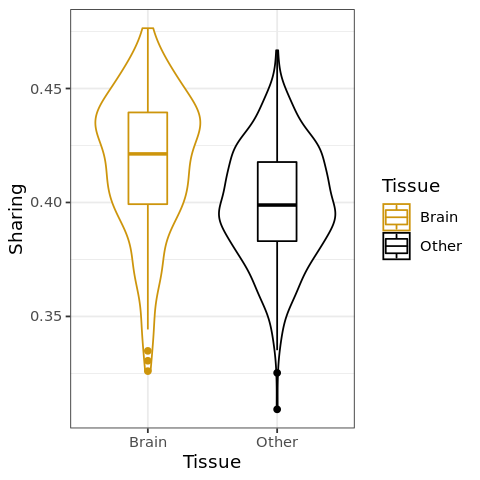

In [86]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df, aes(x = Tissue, y = Sharing, colour = Tissue)) + geom_violin() + geom_boxplot(width = 0.3) + 
    scale_colour_manual(values = c("darkgoldenrod3","black")) + theme_bw()

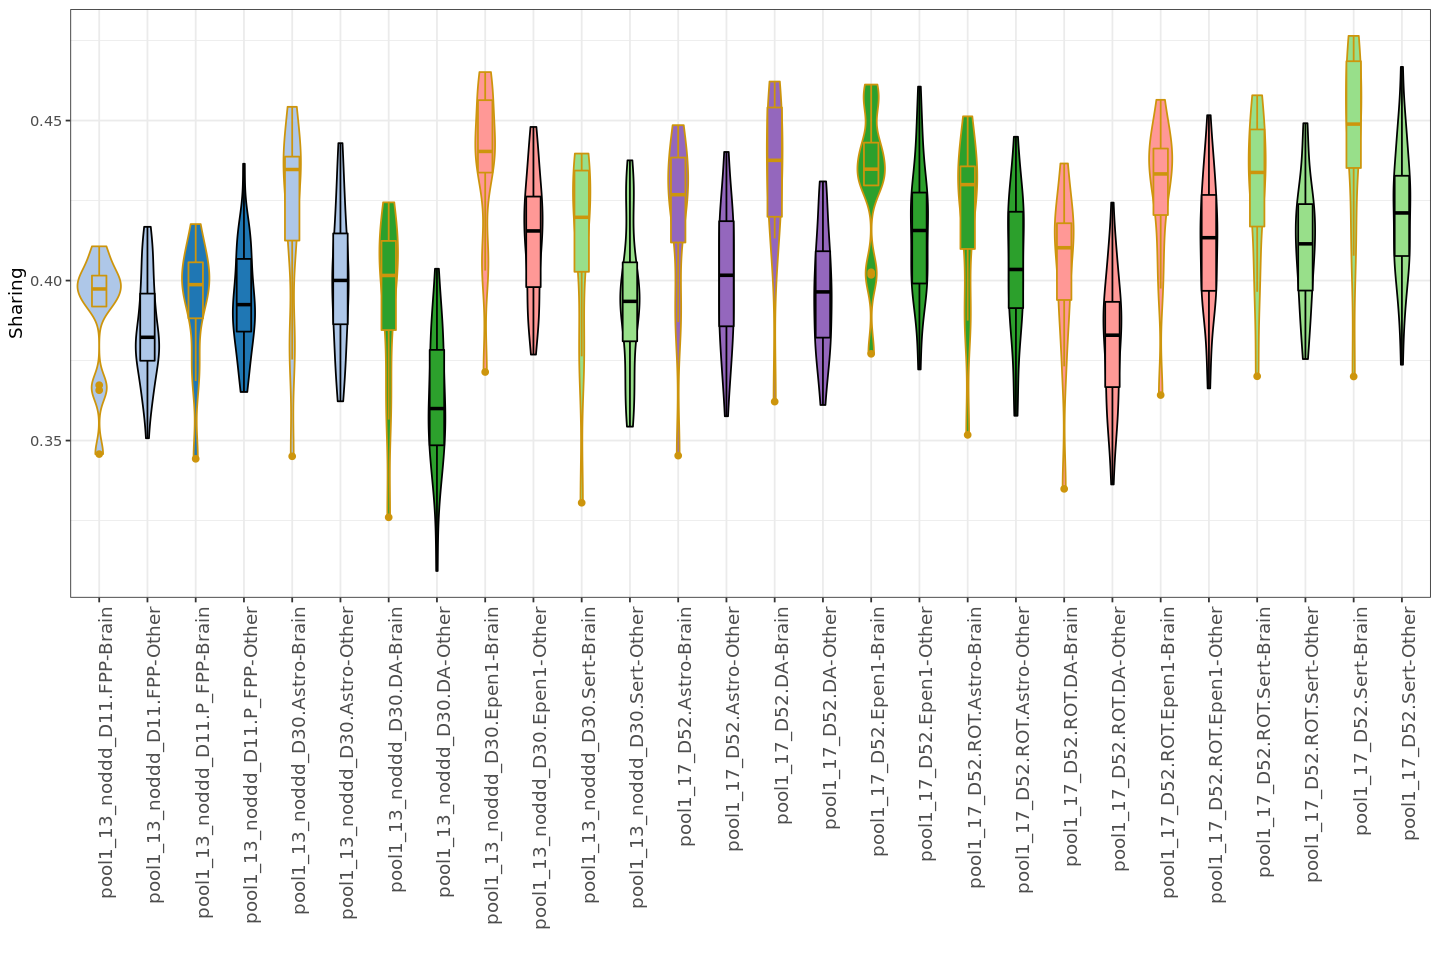

In [87]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=comparison, y=Sharing, fill=CellType, col = Tissue)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_colour_manual(values = c("darkgoldenrod3","black"))+
                scale_fill_manual(values = c(
#                     "gold","brown",
#                     col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") + 
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 